
### AutoEncoder

머신러닝 학습법
1. 지도 학습
    - 프로그램에게 원하는 결과를 알려주고 학습하게 하는 방법
    - X, Y 둘다 있다.
2. 비지도 학습
    - 입력값으로부터 데이터의 특징을 찾아내는 학습 방법
    - X만 있다.

#### 8.1 AutoEncoder 개념
- 입력값과 출력값을 같게 하는 신경망이다.
- 가운데 계층의 노드 수가 입력값보다 **작은 것**이 특징. -> 데이터 **압축** 효과 -> **노이즈 제거**
- 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보내고, 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸 뒤, 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아낸다.
- 변이형 , 잡음제거 등 다양한 방식이 있다.

![오토인코더](./img/img1.JPG)


#### 8.2 구현하기

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("..\data\mnist\data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ..\data\mnist\data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ..\data\mnist\data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ..\data\mnist\data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ..\data\mnist\data\t10k-labels-idx1-ubyte.gz


In [4]:

################
# 하이퍼파라미터 설정
################
learning_rate = 0.01    # 학습률
training_epoch = 20     # 전체 데이터를 학습할 횟수
batch_size = 100        # 미니배치로 한 번에 학습할 데이터 개수
n_hidden = 256          # 은닉층 뉴런 수
n_input = 28*28         # 입력값 크기 (MNIST 28*28 = 784)



#############
# 모델 구성
#############
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 
# 입력값 n_input보다 n_hidden값이 더 작다(반대인 오토인코더도 있음)
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

# 디코더
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))



구현된 신경망 모델 구성  
![모델 구성](./img/img2.JPG)

기본적인 AutoEncoder의 목적은 출력값을 입력값과 가장 비슷하게 만드는 것 -> 압축된 은닉층의 뉴런들을 통해 입력값의 특징을 알아낼 수 있다.  

따라서 입력값인 X를 평가하기 위한 실측값으로 사용하고, 디코더가 내보낸 결과값과의 차이를 손실값으로 설정했다. (입력값 - 디코더 출력값) 
이 값의 차이는 거리 함수로 구한다.

Epoch:: 0001 Avg. cost = 0.1924
Epoch:: 0002 Avg. cost = 0.0525
Epoch:: 0003 Avg. cost = 0.0417
Epoch:: 0004 Avg. cost = 0.0362
Epoch:: 0005 Avg. cost = 0.0325
Epoch:: 0006 Avg. cost = 0.0300
Epoch:: 0007 Avg. cost = 0.0287
Epoch:: 0008 Avg. cost = 0.0279
Epoch:: 0009 Avg. cost = 0.0270
Epoch:: 0010 Avg. cost = 0.0264
Epoch:: 0011 Avg. cost = 0.0259
Epoch:: 0012 Avg. cost = 0.0248
Epoch:: 0013 Avg. cost = 0.0242
Epoch:: 0014 Avg. cost = 0.0229
Epoch:: 0015 Avg. cost = 0.0225
Epoch:: 0016 Avg. cost = 0.0223
Epoch:: 0017 Avg. cost = 0.0221
Epoch:: 0018 Avg. cost = 0.0217
Epoch:: 0019 Avg. cost = 0.0214
Epoch:: 0020 Avg. cost = 0.0211
최적화 완료!


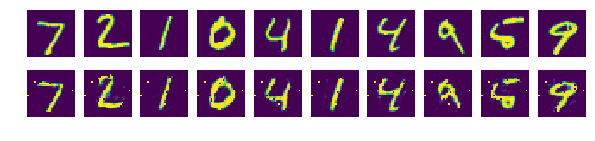

In [6]:
# 손실 함수
cost = tf.reduce_mean(tf.pow(X - decoder, 2))

# 최적화 함수 : RMSPropOptimizer
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)



##############
# 신경망 학습
##############
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict = {X: batch_xs})
        total_cost += cost_val
        
    print('Epoch::', '%04d' % (epoch + 1),
         'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')


#################
# 결과 확인
#################
# 정확도가 아닌, 디코더가 생성해낸 결과를 직관적으로 확인

# 10개의 테스트 데이터를 가져와 디코터를 이용해 출력값으로 만든다.
sample_size = 10
samples = sess.run(decoder,
                 feed_dict={X: mnist.test.images[:sample_size]})

# numpy 모듈로 MNIST 데이터를 28*28 이미지 데이터로 재구성
# imshow 함수로 그래프에 이미지로 출력 (위:입력, 아래:출력)
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
plt.show()